### Importing the required libraries

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data from the CSV file

In [503]:
emission_table = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

In [504]:
emission_table

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
5,Australia,2009,408448.479000,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
6,Australia,2008,404237.828214,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
7,Australia,2007,398816.453544,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
8,Australia,2006,391134.100909,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
9,Australia,2005,385581.132806,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [505]:
pd.set_option('display.max_colwidth', -1)

In [506]:
by_category  = emission_table.groupby(['category'])

In [507]:
category_count = by_category.count()

In [508]:
category_count

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [509]:
strp = category_count.index

In [510]:
io = strp[0]
io[108]

't'

In [511]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [512]:
hdd = len(io)
hdd

109

In [513]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [514]:
# Here we get success
io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [515]:
new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [516]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [517]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [518]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [519]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [520]:
category_count["Shorted_category"] = short_category

In [521]:
category_count

,country_or_area,year,value,Shorted_category
category,,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,co2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949,ghg(indirect co2)
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ghg
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975,hfc
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ch4
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248,nf3
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,n2o
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831,pfc
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032,sf6


### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [522]:
trying_emission = emission_table

In [523]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [524]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [525]:
l.count()

,category,country_or_area,year,value
0,CH4,1074,1074,1074
1,CO2,1074,1074,1074
2,GHG,1074,1074,1074
3,GHG(Indirect CO2),949,949,949
4,HFC,975,975,975
5,HFC+PFC,75,75,75
6,N2O,1074,1074,1074
7,NF3,248,248,248
8,PFC,831,831,831
9,SF6,1032,1032,1032


### Exploratory Data Analysis

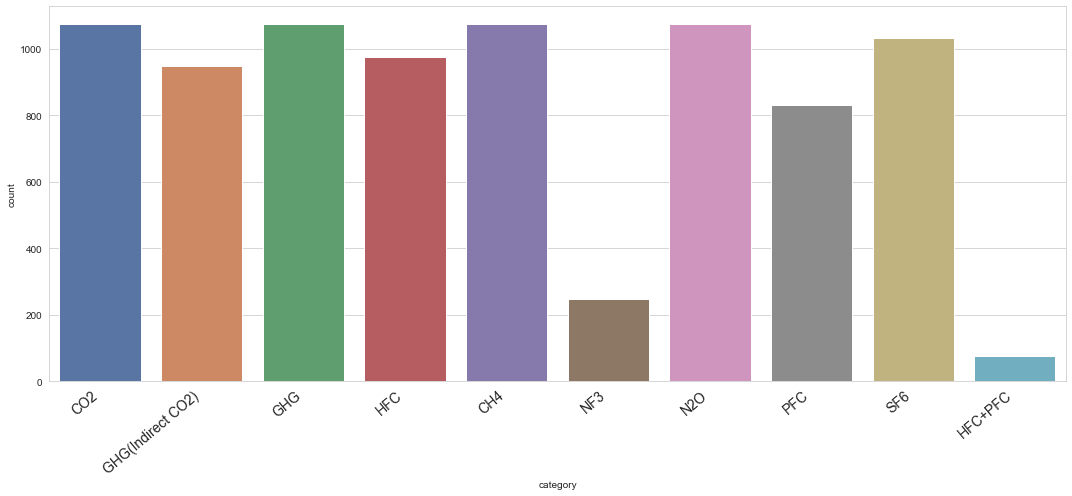

In [526]:
sns.set_palette("deep")
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
ax = sns.countplot(replaced_emission["category"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
plt.tight_layout()
plt.show()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [527]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [528]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [529]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [530]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [531]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [532]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [533]:
new_dataframe_emission

,category,Total Amount Emitted(In Kilotones)
2,GHG,5.851885e+08
3,GHG(Indirect CO2),5.574527e+08
1,CO2,4.640204e+08
0,CH4,7.872711e+07
6,N2O,3.213675e+07
4,HFC,7.272892e+06
8,PFC,1.515173e+06
9,SF6,1.243163e+06
5,HFC+PFC,2.448399e+05
7,NF3,2.813987e+04


**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

*Lets try another approach*

In [534]:
replaced_emission.head()

,country_or_area,year,value,category,Total Emitted Gas
0,Australia,2014,393126.946994,CO2,4.640204e+08
1,Australia,2013,396913.936530,CO2,4.640204e+08
2,Australia,2012,406462.847704,CO2,4.640204e+08
3,Australia,2011,403705.528314,CO2,4.640204e+08
4,Australia,2010,406200.993184,CO2,4.640204e+08


In [535]:
Australia_data = replaced_emission[replaced_emission["country_or_area"]=="Australia"].groupby(["category","year"],as_index = False)

In [536]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [537]:
data_div

category                                 CH4           CO2           GHG  \
country_or_area          year                                              
Australia                1990  118768.837813  2.782659e+05  4.186230e+05   
                         1991  117744.641814  2.797416e+05  4.186741e+05   
                         1992  116837.506726  2.847661e+05  4.230801e+05   
                         1993  113837.511923  2.891423e+05  4.237649e+05   
                         1994  110997.410185  2.938307e+05  4.240930e+05   
                         1995  109900.735111  3.051625e+05  4.334787e+05   
                         1996  109185.337720  3.119148e+05  4.398040e+05   
                         1997  111898.854749  3.204391e+05  4.517217e+05   
                         1998  111427.929806  3.343281e+05  4.663821e+05   
                         1999  107889.224971  3.437139e+05  4.722460e+05   
                         2000  111520.309552  3.498854e+05  4.834458e+05   
                         2001  110301.733954  3.576533e+05  4.914417e+05   
                         2002  108309.143528  3.618614e+05  4.947401e+05   
                         2003  102574.207810  3.683460e+05  4.951541e+05   
                         2004  103839.210857  3.815193e+05  5.117102e+05   
                         2005  105887.562989  3.855811e+05  5.188508e+05   
                         2006  104842.389866  3.911341e+05  5.225172e+05   
                         2007  105174.667802  3.988165e+05  5.298429e+05   
                         2008  103119.546054  4.042378e+05  5.336935e+05   
                         2009  101886.833298  4.084485e+05  5.378899e+05   
                         2010  99447.730159   4.062010e+05  5.339174e+05   
                         2011  101085.537857  4.037055e+05  5.340898e+05   
                         2012  100796.838744  4.064628e+05  5.373776e+05   
                         2013  99857.204626   3.969139e+05  5.268827e+05   
                         2014  98076.109401   3.931269e+05  5.223971e+05   
Austria                  1990  10598.566361   6.229717e+04  7.884463e+04   
                         1991  10462.096189   6.590351e+04  8.263690e+04   
                         1992  10164.748677   6.043225e+04  7.593100e+04   
                         1993  10073.833199   6.079076e+04  7.598823e+04   
                         1994  9775.857792    6.118910e+04  7.650349e+04   
...                                     ...            ...           ...   
United Kingdom           2010  66694.938908   5.075957e+05  6.141667e+05   
                         2011  63739.891235   4.648857e+05  5.659890e+05   
                         2012  60961.914039   4.843881e+05  5.829466e+05   
                         2013  56195.511864   4.758321e+05  5.700785e+05   
                         2014  53890.864763   4.347946e+05  5.275008e+05   
United States of America 1990  773854.896420  5.115095e+06  6.397144e+06   
                         1991  777034.220915  5.064880e+06  6.330938e+06   
                         1992  776869.789752  5.170274e+06  6.448677e+06   
                         1993  764089.671267  5.284759e+06  6.566416e+06   
                         1994  770450.426146  5.377492e+06  6.650297e+06   
                         1995  767943.405720  5.441599e+06  6.748529e+06   
                         1996  762203.846175  5.630114e+06  6.949838e+06   
                         1997  747177.110143  5.704997e+06  6.999999e+06   
                         1998  737821.420620  5.744672e+06  7.066788e+06   
                         1999  723454.873640  5.818972e+06  7.090443e+06   
                         2000  717473.935246  5.992438e+06  7.258973e+06   
                         2001  712676.764974  5.894463e+06  7.140899e+06   
                         2002  706330.241905  5.935739e+06  7.185328e+06   
                         2003  708554.517044  5.982289e+06  7.224974e+06   
                         2004  704886.776627  6.

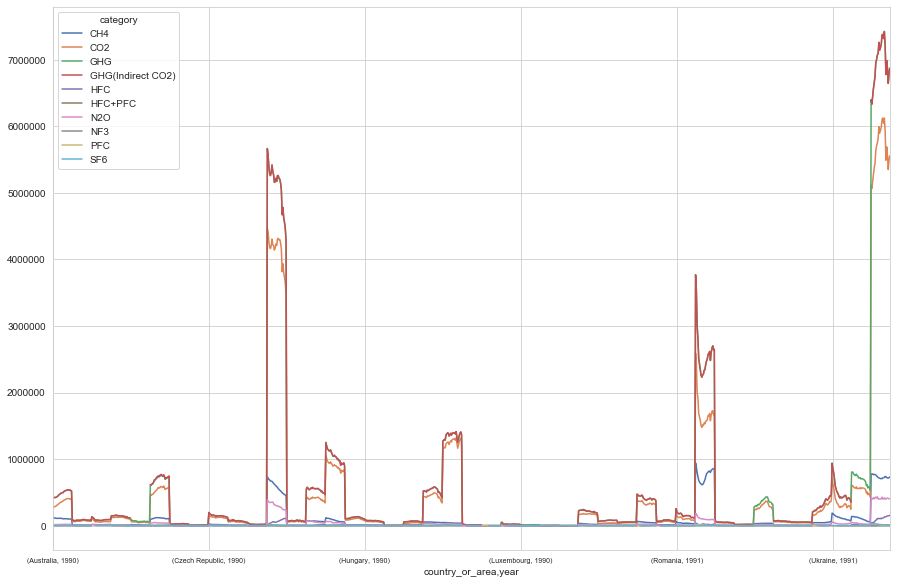

In [538]:
plt.rcParams["figure.figsize"] = [15, 10]
data_div.plot()

This doesn't depict the correct info and looks like a mess

### Plotting Country Wise